In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
from sklearn.model_selection import ShuffleSplit
y = data.target
X = data.data
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index, test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [4]:
clf.fit(X_train, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
clf.score(X_test, y_test)

0.9473684210526315

In [6]:
y_test


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [7]:
np.count_nonzero(y_test==0), np.count_nonzero(y_test==1)

(47, 67)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
conf_mat = np.zeros([2,2])

for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] +=1

In [10]:
print(conf_mat)

[[45.  2.]
 [ 4. 63.]]


In [11]:
import pandas as pd
df = pd.DataFrame(conf_mat, columns=["pred 0", "pred 1"], index=["true 0", "true 1"])

In [12]:
print(df)

        pred 0  pred 1
true 0    45.0     2.0
true 1     4.0    63.0


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[45,  2],
       [ 4, 63]])

In [15]:
TP = cmat[0,0]
TP

45

In [16]:
TN = cmat[1,1]
TN

63

In [17]:
FP = cmat[1,0]
FP

4

In [18]:
FN = cmat[0,1]
FN

2

# 多クラス問題

In [19]:
from sklearn.datasets import load_digits

data = load_digits()

X = data.data
y = data.target

In [20]:
img = data.images

In [21]:
X[0].shape, img[0].shape

((64,), (8, 8))

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 7.5, 7.5, -0.5)

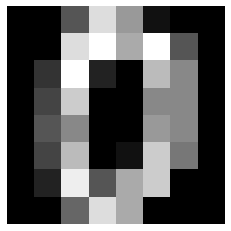

In [23]:
plt.gray()
plt.imshow(img[0], interpolation='none')
plt.axis('off')

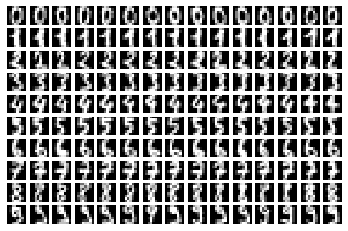

In [24]:
for i in range(10):
    i_th_digit = data.images[data.target == i]
    for j in range(0,15):
        plt.subplot(10, 15, i*15+j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [25]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index, test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [26]:
clf.fit(X_train, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
clf.score(X_test, y_test)

0.9666666666666667

In [28]:
y_pred = clf.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [30]:
conf_mat = confusion_matrix(y_test, y_pred)

df = pd.DataFrame(conf_mat, columns=range(0,10), index=range(0,10))

print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  34   0   0   0   0   0   0   1   0
2   0   0  35   1   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   0   0   0   0  37   0   0   0   3
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0   1   0   0  38   0   0
8   0   2   1   0   0   0   0   0  36   0
9   0   0   0   0   0   1   0   0   0  40


In [39]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

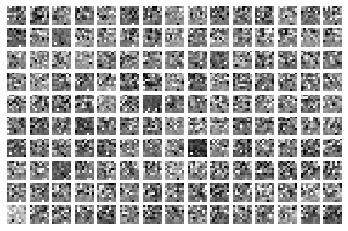

In [40]:
for i in range(10):
    i_th_digit = X_train_pca[y_train==i]
    for j in range(0,15):
        plt.subplot(10, 15, i*15+j+1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [41]:
clf.fit(X_train_pca, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
clf.score(X_test_pca, y_test)

0.9527777777777777

In [43]:
y_pred_pca = clf.predict(X_test_pca)

conf_mat = confusion_matrix(y_test, y_pred_pca)

df = pd.DataFrame(conf_mat, columns=range(0,10), index=range(0,10))

print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  32   0   0   0   0   1   0   2   0
2   0   0  35   1   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   1   0   0   0  38   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0   0   0   0  39   0   0
8   0   3   1   1   0   0   0   0  34   0
9   0   0   0   0   0   1   0   2   1  37


In [44]:
X_train_zca = X_train_pca.dot(pca.components_)
X_test_zca = X_test_pca.dot(pca.components_)

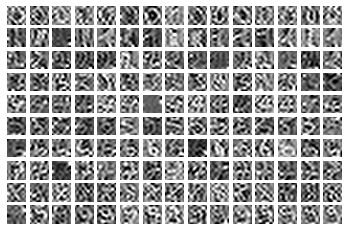

In [45]:
for i in range(10):
    i_th_digit = X_train_zca[y_train ==i]
    for j in range(0,15):
        plt.subplot(10, 15, i* 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='sinc')

In [46]:
clf.fit(X_train_zca, y_train)
clf.score(X_test_zca, y_test)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9527777777777777

In [48]:
scores = []

for i in range(1,65):
    clf.fit(X_train_pca[:, 0:i], y_train)
    score = clf.score(X_test_pca[:, 0:i], y_test)
    print(i, score)
    scores.append(score)
    
scores = np.array(scores)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

1 0.3277777777777778
2 0.5361111111111111
3 0.6333333333333333
4 0.7611111111111111
5 0.8
6 0.8111111111111111
7 0.8666666666666667
8 0.875
9 0.9027777777777778
10 0.9111111111111111
11 0.9361111111111111
12 0.9388888888888889
13 0.9333333333333333
14 0.9361111111111111


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

15 0.9361111111111111
16 0.9416666666666667
17 0.95
18 0.9472222222222222
19 0.95


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

20 0.95
21 0.95
22 0.9527777777777777
23 0.9527777777777777
24 0.95


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

25 0.9444444444444444
26 0.9472222222222222
27 0.9472222222222222
28 0.9527777777777777


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

29 0.9555555555555556
30 0.9472222222222222
31 0.95
32 0.95


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

33 0.9527777777777777
34 0.9527777777777777
35 0.95


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

36 0.95
37 0.9527777777777777
38 0.9472222222222222
39 0.9555555555555556


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

40 0.9527777777777777
41 0.9583333333333334
42 0.9555555555555556


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

43 0.9583333333333334
44 0.9611111111111111
45 0.9583333333333334


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

46 0.9611111111111111
47 0.9583333333333334
48 0.9583333333333334


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

49 0.9555555555555556
50 0.9555555555555556
51 0.9611111111111111


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

52 0.9611111111111111
53 0.9611111111111111
54 0.9583333333333334


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

55 0.9583333333333334
56 0.9611111111111111
57 0.9583333333333334


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

58 0.9583333333333334
59 0.9611111111111111
60 0.9555555555555556


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

61 0.9555555555555556
62 0.9527777777777777
63 0.9555555555555556


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

64 0.9527777777777777


(0.9, 1)

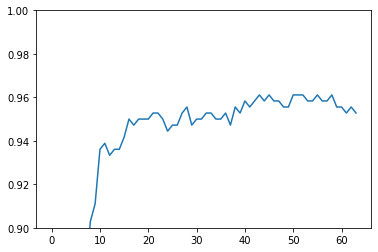

In [49]:
plt.plot(scores)
plt.ylim(0.9, 1)